In [0]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [0]:
#read data from csv
points = pd.read_csv("http://gunet2.cs.unipi.gr/modules/document/file.php/TMI100/Datasets/points_example.csv") 

In [0]:
#set custom color pallete
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139', '#f0f019', '#68c182']

In [0]:
#test function
def test(x):
    return x*2

In [5]:
# print points
points

,x,y
0,1.50,2.10
1,1.30,3.15
2,1.40,4.10
3,2.10,2.20
4,2.20,5.10
5,3.15,8.10
6,3.20,9.20
7,3.30,10.25
8,3.50,11.15
9,3.10,12.10


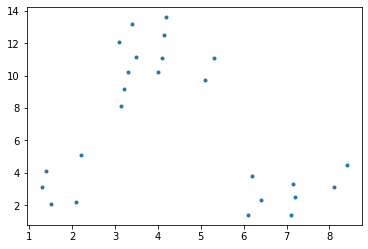

In [6]:
# show points
plt.plot(points.x,points.y,".")
plt.show()

In [0]:
#set number of clusters for K-means
no_of_clusters = 5
#Compute k-means clustering
kmeans = KMeans(n_clusters=no_of_clusters, random_state=0).fit(points)

In [8]:
#Predict the closest cluster each point belongs to
kmeans.predict(points)

array([2, 2, 2, 2, 2, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 4, 4, 1, 4, 4,
       1, 1, 1], dtype=int32)

In [9]:
# Coordinates of cluster centers & print
centers = kmeans.cluster_centers_
centers

array([[ 3.96428571, 12.10714286],
       [ 7.4625    ,  3.675     ],
       [ 1.7       ,  3.33      ],
       [ 3.75      ,  9.49      ],
       [ 6.7       ,  1.9       ]])

In [0]:
#Add column 'cluster' to points array
points["cluster"]=kmeans.predict(points)

In [11]:
# Number of iterations run
kmeans.n_iter_

3

In [12]:
# Sum of squared distances of samples to their closest cluster center
kmeans.inertia_

28.860089285714277

In [13]:
#print 10 first values of points array
points.head(10)

,x,y,cluster
0,1.50,2.10,2
1,1.30,3.15,2
2,1.40,4.10,2
3,2.10,2.20,2
4,2.20,5.10,2
5,3.15,8.10,3
6,3.20,9.20,3
7,3.30,10.25,3
8,3.50,11.15,0
9,3.10,12.10,0


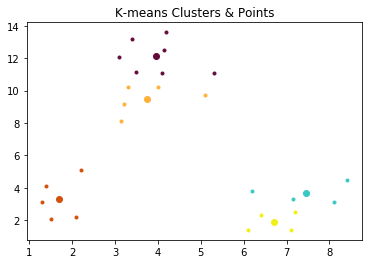

In [14]:
#Show points per cluster
n = 0
while n < no_of_clusters:
    plt.plot(points.x.loc[points.cluster == n],points.y.loc[points.cluster == n],".",c=customPalette[n])
    plt.plot(centers[n,0],centers[n,1] ,"ro",c=customPalette[n])
    n = n + 1
plt.title('K-means Clusters & Points', color= 'Black')
plt.show()

In [15]:
# Groups by cluster
points.groupby("cluster").groups

{0: Int64Index([8, 9, 10, 12, 13, 14, 16], dtype='int64'),
 1: Int64Index([19, 22, 23, 24], dtype='int64'),
 2: Int64Index([0, 1, 2, 3, 4], dtype='int64'),
 3: Int64Index([5, 6, 7, 11, 15], dtype='int64'),
 4: Int64Index([17, 18, 20, 21], dtype='int64')}

In [16]:
points.groupby("cluster").get_group(0)

,x,y,cluster
8,3.50,11.15,0
9,3.10,12.10,0
10,3.40,13.20,0
12,4.10,11.10,0
13,4.15,12.50,0
14,4.20,13.60,0
16,5.30,11.10,0


In [17]:
points.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
x,1.5,1.30,1.4,2.1,2.2,3.15,3.2,3.30,3.50,3.1,3.4,4.0,4.1,4.15,4.2,5.1,5.3,6.1,6.4,6.2,7.1,7.2,7.15,8.1,8.4
y,2.1,3.15,4.1,2.2,5.1,8.10,9.2,10.25,11.15,12.1,13.2,10.2,11.1,12.50,13.6,9.7,11.1,1.4,2.3,3.8,1.4,2.5,3.30,3.1,4.5
cluster,2.0,2.00,2.0,2.0,2.0,3.00,3.0,3.00,0.00,0.0,0.0,3.0,0.0,0.00,0.0,3.0,0.0,4.0,4.0,1.0,4.0,4.0,1.00,1.0,1.0


In [18]:
# Random sample
points.sample(n=2)

,x,y,cluster
17,6.1,1.4,4
10,3.4,13.2,0


In [19]:
points.notnull().sum()

x          25
y          25
cluster    25
dtype: int64

In [20]:
points['x'].median()

4.1

In [21]:
points['y'].mean()

6.846000000000001

In [0]:
#read data from csv
pointsh = pd.read_csv("http://gunet2.cs.unipi.gr/modules/document/file.php/TMI100/Datasets/points_example.csv") 
# pointsh = points.loc[:,:]
# pointsh

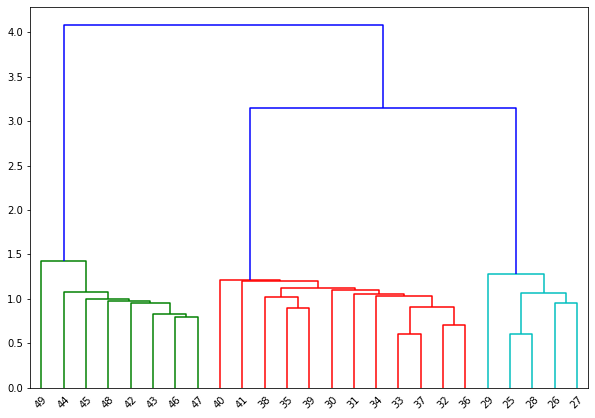

In [23]:
# Create dendrogram
linked = linkage(pointsh, 'single')

labelList = range(0, pointsh.size)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [24]:
#Number of Clusters for Agglomerative clustering
n_clusters = 3
#Fit the hierarchical clustering on the data
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='single')
cluster.fit_predict(pointsh)

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0])

In [25]:
pointsh["cluster_hier"]=cluster.fit_predict(pointsh)
pointsh

,x,y,cluster_hier
0,1.50,2.10,1
1,1.30,3.15,1
2,1.40,4.10,1
3,2.10,2.20,1
4,2.20,5.10,1
5,3.15,8.10,2
6,3.20,9.20,2
7,3.30,10.25,2
8,3.50,11.15,2
9,3.10,12.10,2


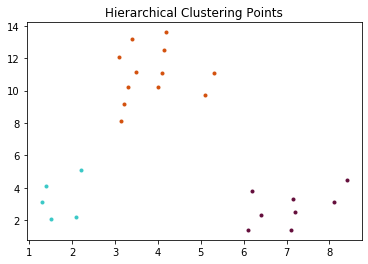

In [26]:
#Show points per cluster
nh = 0
while nh < n_clusters:
    plt.plot(pointsh.x.loc[pointsh.cluster_hier == nh],pointsh.y.loc[pointsh.cluster_hier == nh],".",c=customPalette[nh])
    nh = nh + 1
plt.title('Hierarchical Clustering Points', color= 'Black')
plt.show()

In [0]:
# labels = range(0, points.size)
# #plt.figure(figsize=(10, 7))
# plt.subplots_adjust(bottom=0.1)
# plt.scatter(points.x,points.y, label='True Position')

# for label, x, y in zip(labels, points.x, points.y):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-3, 3),
#         textcoords='offset points', ha='right', va='bottom')
# plt.show()